In [1]:
import pickle
import pandas as pd
import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
#%matplotlib notebook

In [2]:
with open("files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)        

In [3]:
type(products_metadata[0])

dict

In [4]:
products_metadata[0]

{'_id': {'$oid': '605e735f918477c2aed31149'},
 'datasetId': 'MRO_CTX',
 'productDate': '2015-07-09T11:50:36Z',
 'productId': 'F16_041953_1887_XI_08N120W.tif',
 'geometry': {'geometries': [{'type': 'Polygon',
    'coordinates': [[[-120.8384887, 8.2275409],
      [-120.3041802, 8.2275409],
      [-120.3027604, 8.9986119],
      [-120.8381591, 8.9986119],
      [-120.8384887, 8.2275409]]]}],
  'type': 'GeometryCollection'},
 'insertDate': '2021-03-26T23:50:55Z',
 'instrument': 'CONTEXT CAMERA',
 'instrumentId': 'CTX',
 'mission': 'MARS RECONNAISSANCE ORBITER',
 'missionId': 'MRO',
 'observationMode': 'EDR',
 'solarDistance': '',
 'solarLongitude': '',
 'status': '',
 'targetName': 'MARS',
 'previewPath': '/CTX/preview/F16_041953_1887_XI_08N120W.png',
 'version': 'v0'}

In [5]:
products_dates = [ datetime.datetime.fromisoformat(md["productDate"][:-1]+'+00:00') for md in products_metadata]

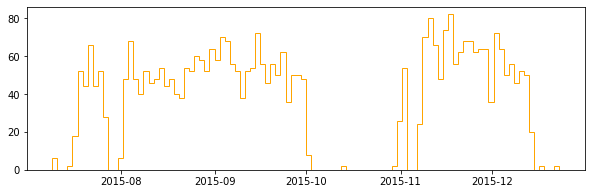

In [6]:
plt.figure(figsize=(10, 3))
_ = plt.hist(products_dates, bins=100, color="orange", histtype="step")

In [7]:
! ls /shared_volume

zipped


In [8]:
from adamapi import Auth
a = Auth()
a.setKey("qCKuUM8PMIx9llcCq8-yD-A1u01TZNN4CHT82Oo4o38")
a.setAdamCore("https://explorer-space.adamplatform.eu")
a.authorize()

{'expires_at': '2022-05-16T17:30:07.366Z',
 'access_token': 'e322bfaaf3744e729c7854ed22b096d2',
 'refresh_token': '9bae538b888d4eb3a95456dfb649bdae',
 'expires_in': 3600}

In [9]:
from adamapi import GetData
data_service=GetData(a)
datasetId = "58592:MRO_CTX"

In [12]:
for product_metadata in tqdm(products_metadata[10:30]):
    output_file = Path(f"/shared_volume/zipped/{product_metadata['productId']}").with_suffix('.zip')
    if not output_file.exists():
        data_service.getData(datasetId, productId = product_metadata["productId"], outputFname=output_file.as_posix())

  0%|          | 0/20 [00:00<?, ?it/s]